In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request


In [2]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))


Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_gk = pd.read_csv('final_gk.csv')
gk_pas_2024=pd.read_csv('gk_pas_2024.csv')
gk_pas_2023=pd.read_csv('gk_pas_2023.csv')
gk_pas_2022=pd.read_csv('gk_pas_2022.csv')
gk_pas_2021=pd.read_csv('gk_pas_2021.csv')
newbie=pd.read_csv('newbie.csv')
# Fill missing values with 0 in place
final_gk.fillna(0, inplace=True)
gk_pas_2023.fillna(0, inplace=True)
gk_pas_2022.fillna(0, inplace=True)
gk_pas_2021.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33-281,1990.0,122.0,122.0,10980.0,122.0,209.0,1.71,589.0,379.0,64.0,41.0,27.0,54.0,20.0,16.0,21.0,12.0,6.0,3.0,29.0,3.0,29.0,5.0,199.1,0.34,-4.9,-0.04,618.0,1686.0,37.0,4405.0,650.0,30.0,31.200,853.0,40.0,36.33,1752.0,107.0,6.0,212.0,1.74,65.30,342.0,1339.0,4083.0,4908.0,77.0,102161.0,71630.0,1055.0,1057.0,100.0,1917.0,1940.0,99.0,1064.0,2209.0,48.0,0.0,0.2,0.4,0.8,3.0,80.0,3.0,0.0,4.0,2.0,11.0,0.09,0.00,4413.0,5531.0,77.0,5600.0,3292.0,2908.0,36.17,45.34,0.63,45.90,26.98,23.84,4.0,0.0,0.0,0.0,0.0,4.0,0.02
1,1,Gregor Kobel,ch SUI,GK,Dortmund+Stuttgart,de Bundesliga,26-094,1997.0,109.0,109.0,9700.0,107.8,150.0,1.39,480.0,332.0,69.0,60.0,22.0,27.0,29.0,27.0,17.0,14.0,3.0,0.0,18.0,3.0,18.0,5.0,152.5,0.32,7.5,0.07,396.0,1013.0,39.0,3361.0,552.0,23.0,28.250,781.0,32.0,33.95,1368.0,54.0,4.0,141.0,1.31,61.60,249.0,761.0,3441.0,3785.0,83.0,82280.0,53597.0,906.0,906.0,100.0,1683.0,1700.0,99.0,809.0,1490.0,54.0,0.0,0.1,0.2,-0.1,1.0,44.0,3.0,0.0,1.0,1.0,12.0,0.11,0.00,3577.0,4403.0,23.0,4425.0,2576.0,2295.0,33.18,40.84,0.21,41.05,23.90,21.29,4.0,0.0,0.0,0.0,0.0,4.0,0.01
2,2,Unai Simón,es ESP,GK,Athletic Club,es La Liga,26-272,1997.0,129.0,129.0,11565.0,128.5,134.0,1.04,419.0,290.0,69.0,51.0,38.0,40.0,43.0,33.0,13.0,11.0,2.0,0.0,15.0,2.0,11.0,7.0,128.1,0.31,1.1,0.01,659.0,1738.0,38.0,2999.0,656.0,38.0,35.350,877.0,67.0,51.22,1758.0,93.0,5.0,149.0,1.16,65.50,589.0,1145.0,2668.0,3756.0,69.0,80377.0,61992.0,414.0,417.0,99.0,1287.0,1314.0,98.0,963.0,2138.0,45.0,0.0,0.0,0.2,0.0,2.0,71.0,3.0,0.0,4.0,1.0,18.0,0.14,0.00,3318.0,4064.0,26.0,4088.0,2189.0,1653.0,25.82,31.63,0.20,31.81,17.04,12.86,4.0,0.0,4.0,0.0,0.0,0.0,0.01
3,3,Pau López,es ESP,GK,Marseille+Roma,fr Ligue 1+it Serie A,29-087,1994.0,106.0,104.0,9391.0,104.4,118.0,1.13,379.0,265.0,70.0,55.0,23.0,26.0,30.0,28.0,12.0,12.0,0.0,0.0,0.0,2.0,21.0,4.0,109.8,0.29,-4.2,-0.04,313.0,944.0,33.0,3380.0,463.0,22.0,28.720,537.0,39.0,35.52,1095.0,57.0,5.0,131.0,1.25,66.70,209.0,732.0,3185.0,4068.0,81.0,76884.0,48669.0,698.0,701.0,100.0,1715.0,1737.0,99.0,755.0,1460.0,52.0,0.0,1.1,0.4,1.9,5.0,48.0,2.0,0.0,5.0,4.0,24.0,0.23,0.00,2715.0,3999.0,128.0,4125.0,2879.0,2343.0,26.01,38.30,1.23,39.51,27.58,22.44,4.0,0.0,0.0,1.0,3.0,0.0,0.04
4,4,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,31-025,1993.0,128.0,128.0,11508.0,127.9,180.0,1.41,590.0,407.0,69.0,29.0,46.0,53.0,38.0,30.0,33.0,29.0,4.0,0.0,12.0,3.0,22.0,1.0,

In [4]:
final_gk.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_Against', 'Goals_Against_per90',
       'Shots_on_Target_Against', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'PK_attempts', 'PK_Allowed', 'PKs_Saved', 'PK_missed',
       'Save%(Penalty Kicks)', 'Gk_free_kick_goals_against',
       'Gk_corner_kick_goals_against', 'Gk_own_goals_against', 'Gk_psxg',
       'Gk_psxg_per_shot_on_target_against', 'Gk_psxg_diff',
       'Gk_psxg_net_per90', 'Gk_passes_completed_launched',
       'Gk_passes_attempted_launched', 'Gk_passes_pct_launched', 'Gk_passes',
       'Gk_passes_throws', 'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
       'Gk_go

In [5]:
final_gk = final_gk[final_gk['90s'] >= 19]
final_gk = final_gk.reset_index(drop=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33-281,1990.0,122.0,122.0,10980.0,122.0,209.0,1.71,589.0,379.0,64.0,41.0,27.0,54.0,20.0,16.0,21.0,12.0,6.0,3.0,29.0,3.0,29.0,5.0,199.1,0.34,-4.9,-0.04,618.0,1686.0,37.0,4405.0,650.0,30.0,31.200,853.0,40.0,36.33,1752.0,107.0,6.0,212.0,1.74,65.30,342.0,1339.0,4083.0,4908.0,77.0,102161.0,71630.0,1055.0,1057.0,100.0,1917.0,1940.0,99.0,1064.0,2209.0,48.0,0.0,0.2,0.4,0.8,3.0,80.0,3.0,0.0,4.0,2.0,11.0,0.09,0.00,4413.0,5531.0,77.0,5600.0,3292.0,2908.0,36.17,45.34,0.63,45.90,26.98,23.84,4.0,0.0,0.0,0.0,0.0,4.0,0.02
1,1,Gregor Kobel,ch SUI,GK,Dortmund+Stuttgart,de Bundesliga,26-094,1997.0,109.0,109.0,9700.0,107.8,150.0,1.39,480.0,332.0,69.0,60.0,22.0,27.0,29.0,27.0,17.0,14.0,3.0,0.0,18.0,3.0,18.0,5.0,152.5,0.32,7.5,0.07,396.0,1013.0,39.0,3361.0,552.0,23.0,28.250,781.0,32.0,33.95,1368.0,54.0,4.0,141.0,1.31,61.60,249.0,761.0,3441.0,3785.0,83.0,82280.0,53597.0,906.0,906.0,100.0,1683.0,1700.0,99.0,809.0,1490.0,54.0,0.0,0.1,0.2,-0.1,1.0,44.0,3.0,0.0,1.0,1.0,12.0,0.11,0.00,3577.0,4403.0,23.0,4425.0,2576.0,2295.0,33.18,40.84,0.21,41.05,23.90,21.29,4.0,0.0,0.0,0.0,0.0,4.0,0.01
2,2,Unai Simón,es ESP,GK,Athletic Club,es La Liga,26-272,1997.0,129.0,129.0,11565.0,128.5,134.0,1.04,419.0,290.0,69.0,51.0,38.0,40.0,43.0,33.0,13.0,11.0,2.0,0.0,15.0,2.0,11.0,7.0,128.1,0.31,1.1,0.01,659.0,1738.0,38.0,2999.0,656.0,38.0,35.350,877.0,67.0,51.22,1758.0,93.0,5.0,149.0,1.16,65.50,589.0,1145.0,2668.0,3756.0,69.0,80377.0,61992.0,414.0,417.0,99.0,1287.0,1314.0,98.0,963.0,2138.0,45.0,0.0,0.0,0.2,0.0,2.0,71.0,3.0,0.0,4.0,1.0,18.0,0.14,0.00,3318.0,4064.0,26.0,4088.0,2189.0,1653.0,25.82,31.63,0.20,31.81,17.04,12.86,4.0,0.0,4.0,0.0,0.0,0.0,0.01
3,3,Pau López,es ESP,GK,Marseille+Roma,fr Ligue 1+it Serie A,29-087,1994.0,106.0,104.0,9391.0,104.4,118.0,1.13,379.0,265.0,70.0,55.0,23.0,26.0,30.0,28.0,12.0,12.0,0.0,0.0,0.0,2.0,21.0,4.0,109.8,0.29,-4.2,-0.04,313.0,944.0,33.0,3380.0,463.0,22.0,28.720,537.0,39.0,35.52,1095.0,57.0,5.0,131.0,1.25,66.70,209.0,732.0,3185.0,4068.0,81.0,76884.0,48669.0,698.0,701.0,100.0,1715.0,1737.0,99.0,755.0,1460.0,52.0,0.0,1.1,0.4,1.9,5.0,48.0,2.0,0.0,5.0,4.0,24.0,0.23,0.00,2715.0,3999.0,128.0,4125.0,2879.0,2343.0,26.01,38.30,1.23,39.51,27.58,22.44,4.0,0.0,0.0,1.0,3.0,0.0,0.04
4,4,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,31-025,1993.0,128.0,128.0,11508.0,127.9,180.0,1.41,590.0,407.0,69.0,29.0,46.0,53.0,38.0,30.0,33.0,29.0,4.0,0.0,12.0,3.0,22.0,1.0,

In [7]:
Ederson=final_gk[final_gk['Player']=='Ederson']
Ederson

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
15,15,Ederson,br BRA,GK,Manchester City,eng Premier League,30-205,1993.0,134.0,134.0,11977.0,133.1,110.0,0.83,323.0,215.0,67.0,97.0,20.0,17.0,58.0,43.0,14.0,13.0,1.0,0.0,7.0,1.0,9.0,3.0,103.1,0.32,-3.9,-0.03,414.0,923.0,45.0,3969.0,585.0,19.0,27.45,536.0,33.0,34.05,1095.0,79.0,7.0,170.0,1.28,69.2,175.0,745.0,3905.0,4391.0,87.0,93451.0,61648.0,909.0,913.0,100.0,2064.0,2096.0,98.0,916.0,1472.0,62.0,0.0,0.6,0.5,1.4,3.0,51.0,4.0,0.0,8.0,2.0,10.0,0.08,0.0,3665.0,4644.0,43.0,4685.0,3116.0,2897.0,27.54,34.89,0.32,35.2,23.41,21.77,4.0,4.0,0.0,0.0,0.0,0.0,0.02


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk = final_gk[~(final_gk['Player'] == 'Ederson')]
final_gk_scaled = scaler.fit_transform(final_gk[relevant_columns])
Ederson_scaled = scaler.transform(Ederson[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Ederson[relevant_columns], final_gk[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(Ederson_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(Ederson_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final_gk['Player'], 'Similarity': cosine_similarity_signed[0],'League':final_gk['Comp'],'Squad':final_gk['Squad'],'Age':final_gk['Age'],'Seasons at top 5': final_gk['Seasons at top 5'],'Seasons in PL': final_gk['Seasons in PL'] ,'Seasons in Liga':final_gk['Seasons in Liga'],'Seasons in Serie A':final_gk['Seasons in Serie A'],'Seasons in Ligue 1': final_gk['Seasons in Ligue 1'],'Seasons in Bundesliga':final_gk['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(10)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(10)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.
most_similar_goalkeepers

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Marc-André ter Stegen,0.866996,es La Liga,Barcelona,31-314,4.0,0.0,4.0,0.0,0.0,0.0
1,Alisson,0.825814,eng Premier League,Liverpool,31-159,4.0,4.0,0.0,0.0,0.0,0.0
2,Yann Sommer,0.779271,it Serie A+de Bundesliga,Inter+Bayern Munich+M'Gladbach+M'Gladbach,35-083,4.0,0.0,0.0,1.0,0.0,3.0
3,Mike Maignan,0.764248,it Serie A+fr Ligue 1,Milan+Lille,28-250,4.0,0.0,0.0,3.0,1.0,0.0
4,Gregor Kobel,0.728762,de Bundesliga,Dortmund+Stuttgart,26-094,4.0,0.0,0.0,0.0,0.0,4.0
5,Wojciech Szczęsny,0.728117,it Serie A,Juventus,33-326,4.0,0.0,0.0,4.0,0.0,0.0
6,Manuel Neuer,0.714675,de Bundesliga,Bayern Munich,37-348,4.0,0.0,0.0,0.0,0.0,4.0
7,Pau López,0.712134,fr Ligue 1+it Serie A,Marseille+Roma,29-087,4.0,0.0,0.0,1.0,3.0,0.0
8,Lukáš Hrádecký,0.706939,de Bundesliga,Leverkusen,34-106,4.0,0.0,0.0,0.0,0.0,4.0
9,Gianluigi Donnarumma,0.677355,fr Ligue 1+it Serie A,Paris S-G+Milan,25-013,4.0,0.0,0.0,1.0,3.0,0.0


In [11]:
least_similar_goalkeepers

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
82,Alphonse Areola,-0.607261,eng Premier League,West Ham,31-011,0.0,0.0,0.0,0.0,0.0,0.0
83,Alexandre Oukidja,-0.650693,fr Ligue 1,Metz,35-234,0.0,0.0,0.0,0.0,0.0,0.0
84,Marco Carnesecchi,-0.660253,it Serie A,Atalanta+Cremonese,23-252,2.0,0.0,0.0,2.0,0.0,0.0
85,Luís Maximiano,-0.663030,es La Liga,Almería,25-064,0.0,0.0,0.0,0.0,0.0,0.0
86,Thomas Kaminski,-0.679546,eng Premier League,Luton Town,31-138,0.0,0.0,0.0,0.0,0.0,0.0
87,Wladimiro Falcone,-0.680936,it Serie A,Lecce,28-332,2.0,0.0,0.0,2.0,0.0,0.0
88,Marko Dmitrović,-0.684297,es La Liga,Sevilla,32-045,2.0,0.0,2.0,0.0,0.0,0.0
89,Neto,-0.696933,eng Premier League,Bournemouth,34-234,2.0,2.0,0.0,0.0,0.0,0.0
90,Wes Foderingham,-0.708528,eng Premier League,Sheffield Utd,33-055,0.0,0.0,0.0,0.0,0.0,0.0
91,Guillermo Ochoa,-0.710782,it Serie A,Salernitana,38-240,2.0,0.0,0.0,2.0,0.0,0.0


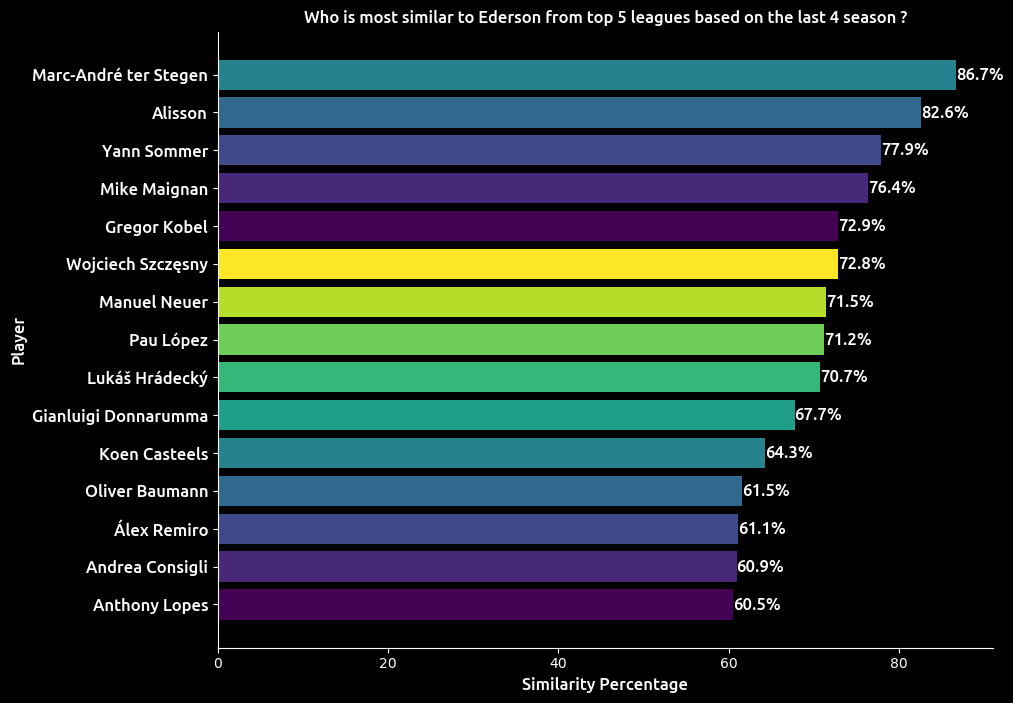

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_rice in descending order
similarity_df_sorted = similarity_df.sort_values(by='Similarity', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(similarity_df_sorted['Player'].head(15)[::-1], (similarity_df_sorted['Similarity'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Ederson from top 5 leagues based on the last 4 season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(similarity_df['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_Ederson.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
